<div class="alert alert-block alert-info" style="margin-top: 20px; background-color:#DCDCDC">
<strong>Classification</strong> Find what class a sample belongs to.
</div>

# Logistic Regression (Classification)

## Overview

- [Description](#Description)  
    - [Background](#Background)
    - [Example](#Example)
    - [Likelihood and Cost Function](#Likelihood-and-Cost-Function)
- [Logistic Regression](#Logistic-Regression)
- [EXAMPLE - Decision Boundaries Visualization](#EXAMPLE---Decision-Boundaries-Visualization)

## Description

**Logistic regression**, despite its name, is a **linear model for classification** rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a [logistic function](https://en.wikipedia.org/wiki/Logistic_function) (also known as sigmoid function).

<img src="images/logistic-curve.png" width="30%">
$$g(z)=\frac{1}{1+e^{-z}}$$ 

The logistic function is useful because it can take any **real input** $z ∈ \mathbb R$, whereas the **output always takes values between zero and one** $g(z) \in \{0, 1\}$ and hence is interpretable as a probability.

Logistic regression is one of the most widely used algorithms for classification in industry and **can be extended to multiclass classification** via the **One versus Rest** (OvR) technique.  

### Background

Given a set of features $x_i$ and a label $y_i \in \{0, 1\}$, **logistic regression interprets the probability that the label is in one class** as a logistic function of a **linear combination of the features**: $w_0 x_0 + w_1 x_1 + ... + w_n x_n = \mathbf w^T \mathbf x = z$

$$f_i(w) = P(y_i =1 \mid x) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\mathbf{w}^T \mathbf{x})}}$$

The output of the sigmoid function is interpreted as the probability of particular sample belonging to class 1 $P(y = 1 \mid x;w)$ given its features $x$ parameterized by the weights $w$. Note that $f_i(w)$ is interpreted as the probability of the dependent variable (target) equaling a 'success' or 'case' or 'positive class' rather than a 'failure' or 'non-case' or 'negative class'.

$$P(y_i = y \mid \mathbf{x_i}) = f_i(w)^{y}(1-f_i(w)^{1-y}$$

The predicted probability can then simply be converted into a binary outcome via a quantizer (unit step function) to **predict the class-label**.

$$\hat{y} =  {\begin{cases}1&{\text{if }}z \geq 0\\0&{\text{otherwise}}\end{cases}}$$

In fact, there are many applications where we are not only interested in the predicted class labels, but where estimating the class-membership probability is particularly useful.

Analogous to linear regression, an intercept term is added by appending a column of 1's to the features and L1 and L2 regularizers are supported. The composite objective being optimized for is the following:

$$\underset{w}{min} \sum_{i=1}^{m}f_i(w) + \lambda_1 \lVert{w}\rVert_1 + \lambda_2 \lVert{w}\rVert_2^{2}$$

where $\lambda_1$ is the L1_penalty and $\lambda_2$ is the L2_penalty

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>logit function</strong> and <strong>logistic function</strong>
<br/>
The **[logit](https://en.wikipedia.org/wiki/Logit)** is a link function / a transformation of a parameter. It is the logarithm of the **[odds](https://en.wikipedia.org/wiki/Odds#)**. If we call the parameter p, it is defined as follows:
<br/>
$$logit(p) = log\left(\frac{p}{1-p}\right)$$
<br/>
The **[logistic](https://en.wikipedia.org/wiki/Logistic_function)** function is the **inverse of the logit**. If we have a value, x, the logistic is:
<br/>
$$logistic(x) = \frac{e^x}{e^x+1} = \frac{1}{1+e^{-x}}$$
<br/>
Thus (using matrix notation where $\mathbf x$ is an $m×n$ matrix and $w$ is a $n×1$ vector), logit regression is:
<br/>
$$logit(p) = log\left(\frac{p}{1-p}\right) = \mathbf{w}^T \mathbf{x}$$
<br/>
and logistic regression is:
<br/>
$$p = \frac{1}{1+e^{-(\mathbf{w}^T \mathbf{x})}}$$
</div>

### Example

The table shows the number of hours each student spent studying, and whether they passed (1) or failed (0).

<table><tr>
<th>Hours</th>
<td>0.50</td>
<td>0.75</td>
<td>1.00</td>
<td>1.25</td>
<td>1.50</td>
<td>1.75</td>
<td>1.75</td>
<td>2.00</td>
<td>2.25</td>
<td>2.50</td>
<td>2.75</td>
<td>3.00</td>
<td>3.25</td>
<td>3.50</td>
<td>4.00</td>
<td>4.25</td>
<td>4.50</td>
<td>4.75</td>
<td>5.00</td>
<td>5.50</td>
</tr>
<tr>
<th>Pass</th>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>1</td>
<td>1</td>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</table>

The graph shows the probability of passing the exam versus the number of hours studying, with the logistic regression curve fitted to the data.

<img src="images/logistic-probabilities-example.png" width="60%">


### Likelihood and Cost Function

Logistic regression pretends to **maximize** the **[likelihood](https://onlinecourses.science.psu.edu/stat414/node/191) L**. Assuming that the individual samples in our dataset are independent of one another, the likelihood is:

$$L(\mathbf{w}) = P(\mathbf{y} \mid \mathbf{x};\mathbf{w}) = \prod_{i=1}^mP(y_i \mid x_i;\mathbf{w}) = \prod_{i=1}^m\left(f_i(w)\right)^{y_i}\left(1-f_i(w)\right)^{1-y_i}$$

It is easier to maximize the natural log of this equation, which is called the **log-likelihood** function:

$$l(\mathbf{w}) = log(L(\mathbf{w})) = \sum_{i=1}^m\left[y_i log(f_i(w))+(1-y_i) log((1-f_i(w))\right]$$

Let's rewrite the log-likelihood as a **cost funtion** $J$ that can be **minimized** using *gradient descent*:

$$J(\mathbf{w}) = -\frac{1}{m}\sum_{i=1}^m\left[-y_i log(f_i(w))-(1-y_i) log((1-f_i(w))\right]$$

## Logistic Regression

[LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) implements regularized logistic regression. LogisticRegreesion and [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) share the same underlying implementation. In fact, Perceptron() is equivalent to SGDClassifier(loss=”log")

Some features:

- It supports multi-class classification.
- It uses parameter penalty for regularization (L2 or L1 regularization) which helps in avoiding overfitting by penalizing weights with large magnitudes.
- It is sensitive to **feature scaling**

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>LogisticRegression</strong> (penalty='l2', C=1.0, fit_intercept=True, solver='liblinear', max_iter=100, tol=0.0001, multi_class='ovr')
<br/>
Parameters:
<ul>
<li>penalty: the penalty (aka regularization term) to be used (‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties)</li>
<li>C: inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization</li>
<li>fit_intercept: whether the intercept should be estimated or not. If False, the data is assumed to be already centered</li>
<li>solver: algorithm to use in the optimization problem (newton-cg, lbfgs, liblinear, or sag)</li>
<li>max_iter: useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge</li>
<li>tol: tolerance for stopping criteria</li>
<li>multi_class: multiclass option can be either ‘ovr’ or ‘multinomial’. If the option chosen is ‘ovr’, then a binary problem is fit for each label. Else the loss minimised is the multinomial loss fit across the entire probability distribution. Works only for the ‘newton-cg’, ‘sag’ and ‘lbfgs’ solver</li>
</ul>
</div>

In [1]:
# load libraries and set plot parameters
import numpy as np
import pandas as pd
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['legend.fontsize'] = 10

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

dataset = load_iris()
print(dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = pd.Series(dataset.target, name='class')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [6]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler(with_mean=True, with_std=True)
sd.fit(X_train)

X_train_std = sd.transform(X_train)
X_test_std = sd.transform(X_test)

In [7]:
lr = LogisticRegression(C=1e3, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
lr.classes_

array([0, 1, 2])

In [9]:
lr.coef_

array([[ -1.54018491,   4.38012217,  -4.3337243 ,  -4.57649837],
       [  0.20418421,  -2.08471653,   1.17706759,  -1.58593541],
       [  4.45181334,   0.41080094,  21.96491921,  14.22689456]])

In [10]:
lr.intercept_

array([ -4.48975436,  -1.26387794, -26.23877223])

In [11]:
print('Accuracy: {0}'.format(lr.score(X_test_std, y_test)))
y_pred = lr.predict(X_test_std)
print('Number of milabeled points: {0}'.format((y_test!=y_pred).sum()))

Accuracy: 0.866666666667
Number of milabeled points: 6


## EXAMPLE - Decision Boundaries Visualization

For visualization purposes we will choose two features: petal widh and petal length

In [12]:
from modules import plot_decision_regions

X = df.drop(labels=['class','sepal length (cm)', 'sepal width (cm)'], axis=1)
y = df['class']
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Accuracy: 0.977777777778
Number of mislabeled points: 1


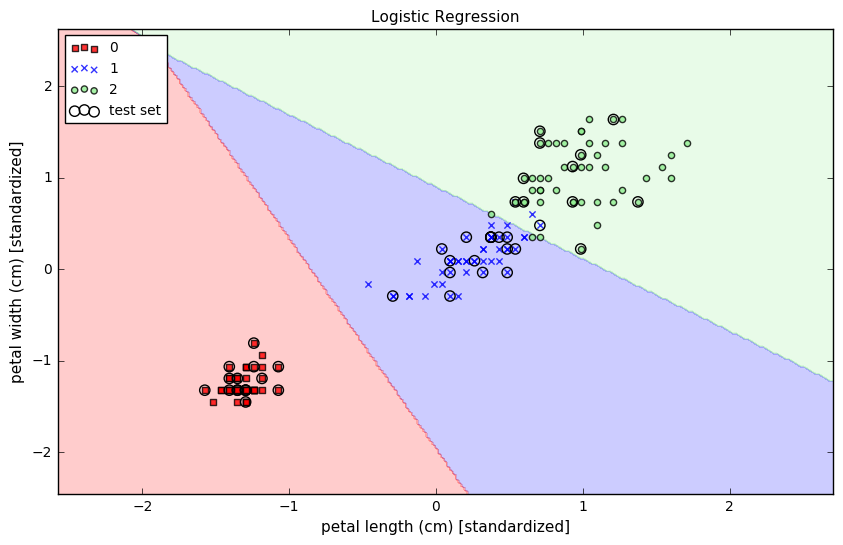

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C=1e3, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, X_test_std, y_train, y_test, classifier=lr, test_marker=True)
plt.title('Logistic Regression')
plt.xlabel('petal length (cm) [standardized]')
plt.ylabel('petal width (cm) [standardized]')

In [14]:
lr.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])